In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
cityvect=["g","l","s","v"]
cityname=["Girona","Lleida","Sabadell","Valls"]

In [18]:
gpartida=pd.read_csv("Girona_partida.csv")
gronda=pd.read_csv("Girona_ronda.csv")
guser=pd.read_csv("Girona_user.csv")
guserronda=pd.read_csv("Girona_userronda.csv")
lpartida=pd.read_csv("Lleida_partida.csv")
lronda=pd.read_csv("Lleida_ronda.csv")
luser=pd.read_csv("Lleida_user.csv")
luserronda=pd.read_csv("Lleida_userronda.csv")
spartida=pd.read_csv("Sabadell_partida.csv")
sronda=pd.read_csv("Sabadell_ronda.csv")
suser=pd.read_csv("Sabadell_user.csv")
suserronda=pd.read_csv("Sabadell_userronda.csv")
vpartida=pd.read_csv("Valls_partida.csv")
vronda=pd.read_csv("Valls_ronda.csv")
vuser=pd.read_csv("Valls_user.csv")
vuserronda=pd.read_csv("Valls_userronda.csv")
display()

In [4]:
# gràfics que no interessen perquè tothom comença amb 40€:
    # mean end capital as a function of start capital
    # relative contributions as a function of start capital with boxplot

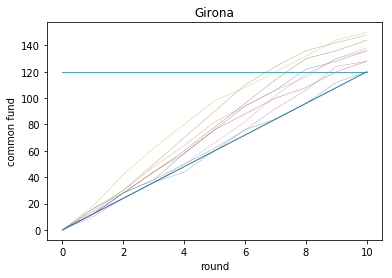

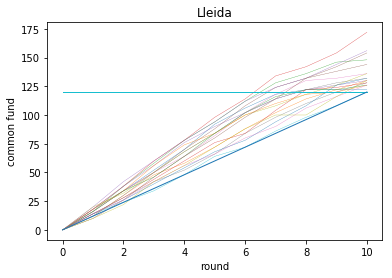

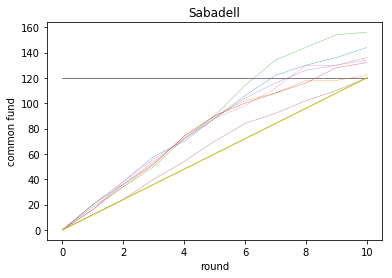

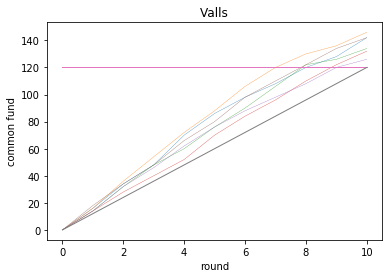

In [5]:
# evolution of funds through the rounds
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    roundi=list(range(0,11))
    roundlist=(0,1,2,3,4,5,6,7,8,9,10)
    for i in range(1,max(rounddf["partida_id"])):
        roundi=rounddf.loc[rounddf["partida_id"]==i]
        roundi=roundi[["bucket_final_ronda"]]
        for j in range (10,0,-1):
            roundi.loc[j+10*(i-1),"bucket_final_ronda"]=120-roundi.loc[(j-1)+10*(i-1),"bucket_final_ronda"]
        roundi.loc[10*(i-1),"bucket_final_ronda"]=0
        plt.plot(roundlist,roundi["bucket_final_ronda"],lw=0.3)
    plt.plot(roundlist,(120,120,120,120,120,120,120,120,120,120,120),lw=1,label="threshold")
    plt.plot(roundlist,(0,12,24,36,48,60,72,84,96,108,120),lw=1,label="cumulative fair contribution")
    plt.xlabel("round")
    plt.ylabel("common fund")
    plt.title(cityname[m])
    plt.show()

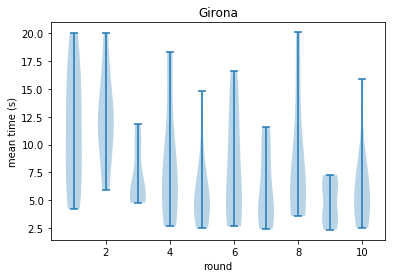

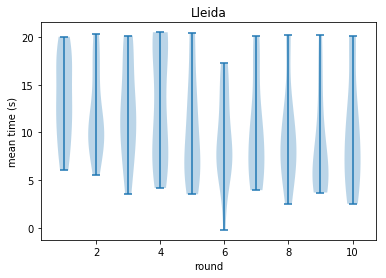

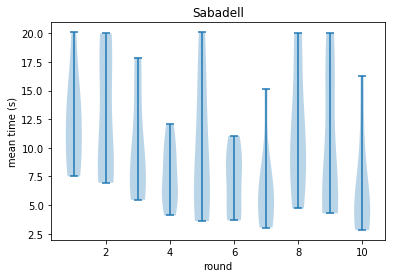

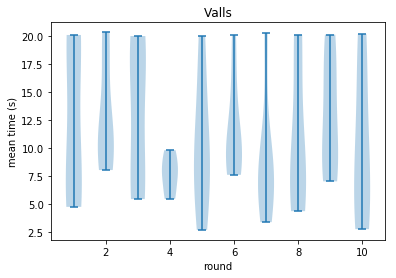

In [6]:
# mean time for each round with violinplot (separate plots)
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    t1=rounddf["temps_inici_ronda"]
    t2=rounddf["temps_final_ronda"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    rounddf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
    timebyround=[[],[],[],[],[],[],[],[],[],[]]
    for k in range(len(rounddf)):
        timebyround[k%10].append(rounddf.loc[k,"time"])
    plt.violinplot(timebyround,positions=[1,2,3,4,5,6,7,8,9,10])
    plt.xlabel("round")
    plt.ylabel("mean time (s)")
    plt.title(cityname[m])
    plt.show()

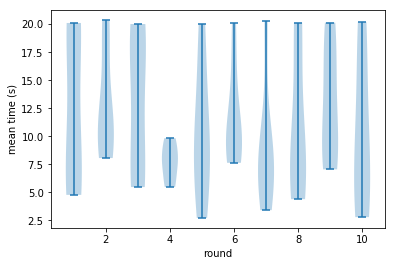

In [7]:
# mean time for each round with violinplot (one plot)
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    t1=rounddf["temps_inici_ronda"]
    t2=rounddf["temps_final_ronda"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    rounddf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
    timebyround=[[],[],[],[],[],[],[],[],[],[]]
    for k in range(len(rounddf)):
        timebyround[k%10].append(rounddf.loc[k,"time"])
plt.violinplot(timebyround,positions=[1,2,3,4,5,6,7,8,9,10])
plt.xlabel("round")
plt.ylabel("mean time (s)")
plt.show()

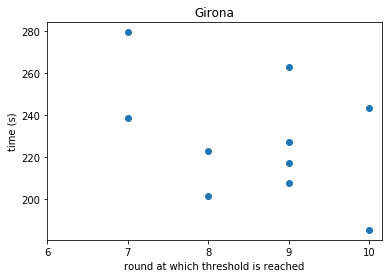

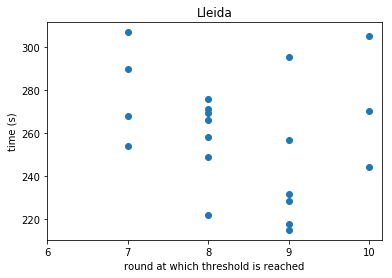

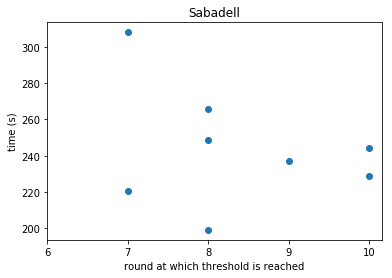

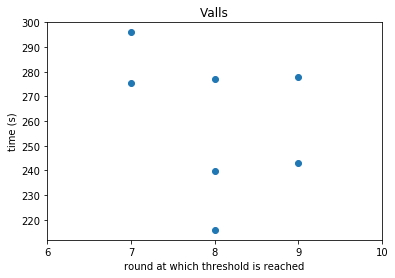

In [8]:
# correlation between time and round with threshold achieved (separate plots)
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    exec("sessiondf="+cityvect[m]+"partida")
    t1=sessiondf["data_inicialitzacio"]
    t2=sessiondf["data_finalitzacio"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    sessiondf["time"]=3600*hr.astype(float)+60*mnt.astype(float)+sec.astype(float)+mcs.astype(float)/1000000.0
    thresholdround=[]
    for k in range(len(rounddf)):
        pot1=rounddf.loc[k,"bucket_inici_ronda"]
        pot2=rounddf.loc[k,"bucket_final_ronda"]
        if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
            thresholdround.append(rounddf.loc[k,"num_ronda"])
    thresholdround=pd.DataFrame(thresholdround)
    plt.scatter(thresholdround,sessiondf["time"])
    plt.xlabel("round at which threshold is reached")
    plt.ylabel("time (s)")
    plt.xticks([6,7,8,9,10])
    plt.title(cityname[m])
    plt.show()

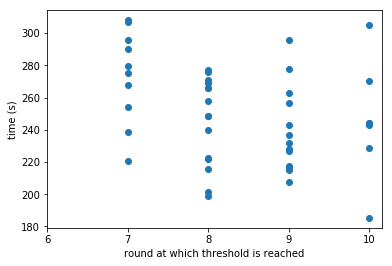

In [9]:
# correlation between time and round with threshold achieved (one plot)
thresholdround=[]
sessiontime=[]
for m in range(4):
    exec("rounddf="+cityvect[m]+"ronda")
    exec("sessiondf="+cityvect[m]+"partida")
    t1=sessiondf["data_inicialitzacio"]
    t2=sessiondf["data_finalitzacio"]
    mcs=t2.str[-6:].astype(int)-t1.str[-6:].astype(int)
    sec=t2.str[-9:-7].astype(int)-t1.str[-9:-7].astype(int)
    mnt=t2.str[-12:-10].astype(int)-t1.str[-12:-10].astype(int)
    hr=t2.str[-15:-13].astype(int)-t1.str[-15:-13].astype(int)
    for k in range(len(sessiondf)):
        sessiontime.append(3600*hr[k].astype(float)+60*mnt[k].astype(float)+sec[k].astype(float)+mcs[k].astype(float)/1000000.0)
    for k in range(len(rounddf)):
        pot1=rounddf.loc[k,"bucket_inici_ronda"]
        pot2=rounddf.loc[k,"bucket_final_ronda"]
        if ((pot1*pot2<0)or((pot1*pot2==0)and(pot1>0 or pot2>0))):
            thresholdround.append(rounddf.loc[k,"num_ronda"])
thresholdround=pd.DataFrame(thresholdround)
sessiontime=pd.DataFrame(sessiontime)
plt.scatter(thresholdround,sessiontime)
plt.xlabel("round at which threshold is reached")
plt.ylabel("time (s)")
plt.xticks([6,7,8,9,10])
plt.show()

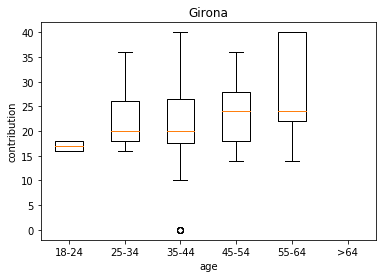

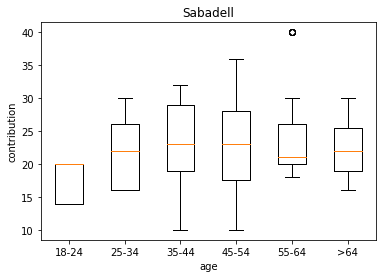

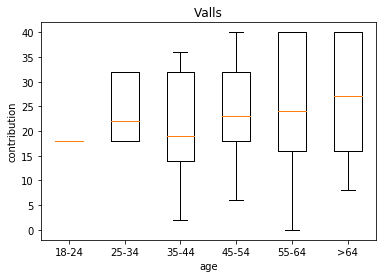

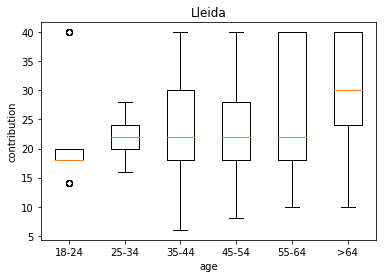

In [10]:
# contribution dependence on age (separate plots)
for m in (0,2,3):
    exec("userdf="+cityvect[m]+"user")
    data=[[],[],[],[],[],[]]
    for k in range(6):
        for i in range(len(userdf)):
            if (userdf.loc[i,"rang_edat"]=="r1"):
                data[0].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r2"):
                data[1].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r3"):
                data[2].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r4"):
                data[3].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r5"):
                data[4].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r6"):
                data[5].append(40-userdf.loc[i,"guany_final"])
    plt.boxplot(data,positions=[1,2,3,4,5,6])
    plt.xticks([1,2,3,4,5,6],["18-24","25-34","35-44","45-54","55-64",">64"])
    plt.xlabel("age")
    plt.ylabel("contribution")
    plt.title(cityname[m])
    plt.show()
# plot de Lleida, les dades de l'edat són numèriques i no per rangs:
exec("userdf=luser")
data=[[],[],[],[],[],[]]
for k in range(6):
    for i in range(len(userdf)):
        if (userdf.loc[i,"rang_edat"]>=18 and userdf.loc[i,"rang_edat"]<25):
            data[0].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=25 and userdf.loc[i,"rang_edat"]<35):
            data[1].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=35 and userdf.loc[i,"rang_edat"]<45):
            data[2].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=45 and userdf.loc[i,"rang_edat"]<55):
            data[3].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=55 and userdf.loc[i,"rang_edat"]<65):
            data[4].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=65):
            data[5].append(40-userdf.loc[i,"guany_final"])
plt.boxplot(data,positions=[1,2,3,4,5,6])
plt.xticks([1,2,3,4,5,6],["18-24","25-34","35-44","45-54","55-64",">64"])
plt.xlabel("age")
plt.ylabel("contribution")
plt.title("Lleida")
plt.show()

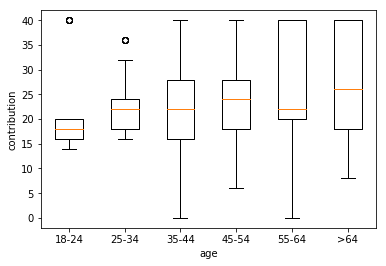

In [11]:
# contribution dependence on age (one plot)
data=[[],[],[],[],[],[]]
for m in (0,2,3):
    exec("userdf="+cityvect[m]+"user")
    for k in range(6):
        for i in range(len(userdf)):
            if (userdf.loc[i,"rang_edat"]=="r1"):
                data[0].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r2"):
                data[1].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r3"):
                data[2].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r4"):
                data[3].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r5"):
                data[4].append(40-userdf.loc[i,"guany_final"])
            elif (userdf.loc[i,"rang_edat"]=="r6"):
                data[5].append(40-userdf.loc[i,"guany_final"])
exec("userdf=luser")
for k in range(6):
    for i in range(len(userdf)):
        if (userdf.loc[i,"rang_edat"]>=18 and userdf.loc[i,"rang_edat"]<25):
            data[0].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=25 and userdf.loc[i,"rang_edat"]<35):
            data[1].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=35 and userdf.loc[i,"rang_edat"]<45):
            data[2].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=45 and userdf.loc[i,"rang_edat"]<55):
            data[3].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=55 and userdf.loc[i,"rang_edat"]<65):
            data[4].append(40-userdf.loc[i,"guany_final"])
        elif (userdf.loc[i,"rang_edat"]>=65):
            data[5].append(40-userdf.loc[i,"guany_final"])
plt.boxplot(data,positions=[1,2,3,4,5,6])
plt.xticks([1,2,3,4,5,6],["18-24","25-34","35-44","45-54","55-64",">64"])
plt.xlabel("age")
plt.ylabel("contribution")
plt.show()

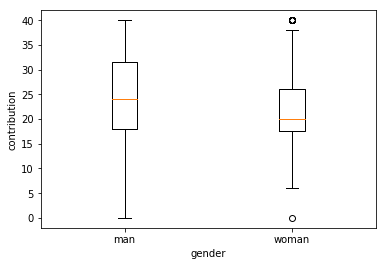

In [12]:
# contribution dependence on gender
data=[[],[]]
for m in range(4):
    exec("userdf="+cityvect[m]+"user")
    for i in range(len(userdf)):
        if (userdf.loc[i,"genere"]=="h"):
            data[0].append(40-userdf.loc[i,"guany_final"])
        if (userdf.loc[i,"genere"]=="d"):
            data[1].append(40-userdf.loc[i,"guany_final"])
plt.boxplot(data,positions=[0,1])
plt.xticks([0,1],["man","woman"])
plt.xlabel("gender")
plt.ylabel("contribution")
plt.show()

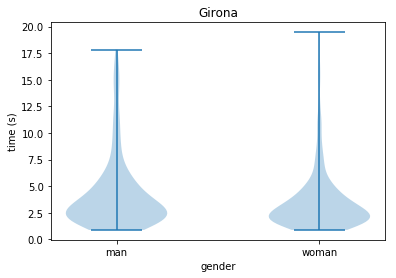

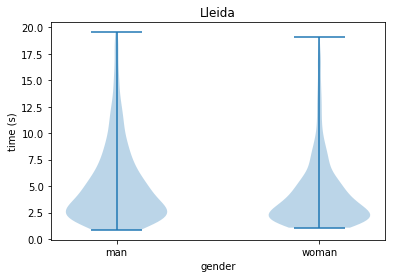

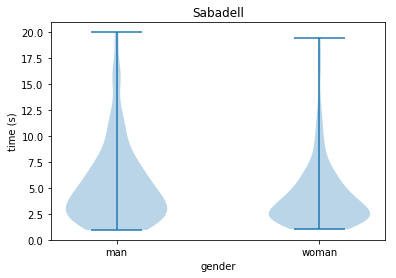

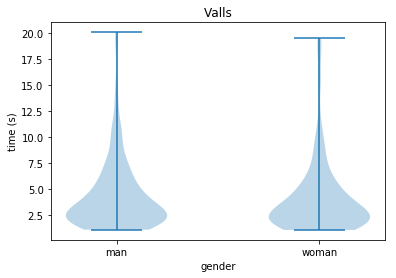

In [13]:
# mean time depending on gender
for m in range(4):
    data=[[],[]]
    exec("userrounddf="+cityvect[m]+"userronda")
    exec("rounddf="+cityvect[m]+"ronda")
    exec("userdf="+cityvect[m]+"user")
    for i in range(len(userrounddf)):
        userrounddf.loc[i,"temps_inicial"]=rounddf.loc[i//6,"temps_inici_ronda"]
    for j in range(len(userrounddf)):
        if (pd.isna(userrounddf.loc[j,"temps_seleccio"])==False and pd.isna(userrounddf.loc[j,"temps_inicial"])==False):
            time1=str(userrounddf.loc[j,"temps_seleccio"])
            time0=str(userrounddf.loc[j,"temps_inicial"])
            mcs=float(time1[-6:])-float(time0[-6:])
            sec=float(time1[-9:-7])-float(time0[-9:-7])
            mnt=float(time1[-12:-10])-float(time0[-12:-10])
            hr=float(time1[-15:-13])-float(time0[-15:-13])
            time=3600.0*hr+60.0*mnt+sec+mcs/1000000.0
            if ((m==1 and userrounddf.loc[j,"user_id"]>42) or (m==3 and userrounddf.loc[j,"user_id"]>17)):
                # modificació perquè no hi ha user_id=42 a Lleida ni user_id=17 a Valls
                if (userdf.loc[userrounddf.loc[j,"user_id"]-2,"genere"]=="h" and time>=0):
                    data[0].append(time)
                elif (userdf.loc[userrounddf.loc[j,"user_id"]-2,"genere"]=="d" and time>=0):
                    data[1].append(time)
            else:
                if (userdf.loc[userrounddf.loc[j,"user_id"]-1,"genere"]=="h" and time>=0):
                    data[0].append(time)
                elif (userdf.loc[userrounddf.loc[j,"user_id"]-1,"genere"]=="d" and time>=0):
                    data[1].append(time)
    plt.violinplot(data,positions=[0,1])
    plt.xticks([0,1],["man","woman"])
    plt.xlabel("gender")
    plt.ylabel("time (s)")
    plt.title(cityname[m])
    plt.show()

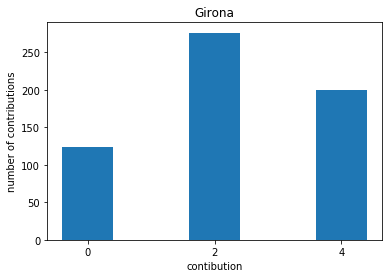

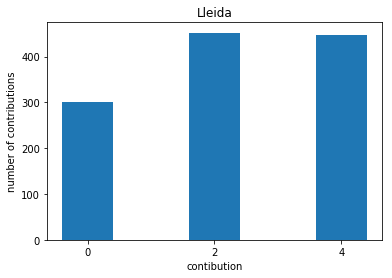

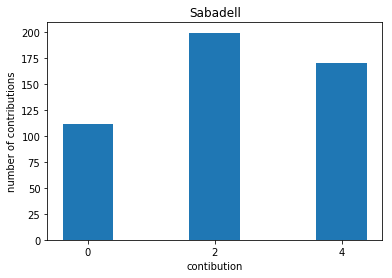

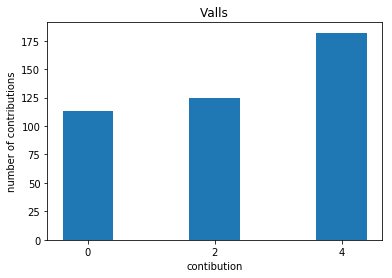

In [14]:
# number of contribution of each value
for m in range(4):
    exec("userrounddf="+cityvect[m]+"userronda")
    exec("rounddf="+cityvect[m]+"ronda")
    count=[0,0,0]
    for i in range(len(userrounddf)):
        for n in range(3):
            if (userrounddf.loc[i,"seleccio"]==2*n):
                count[n]+=1
    plt.bar([0,2,4],count)
    plt.xticks([0,2,4],[0,2,4])
    plt.xlabel("contibution")
    plt.ylabel("number of contributions")
    plt.title(cityname[m])
    plt.show()

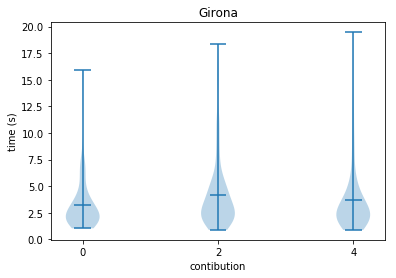

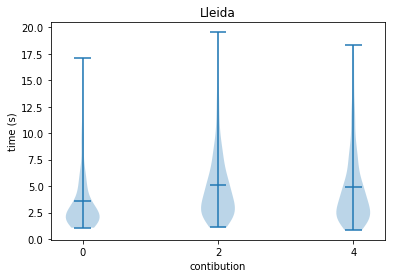

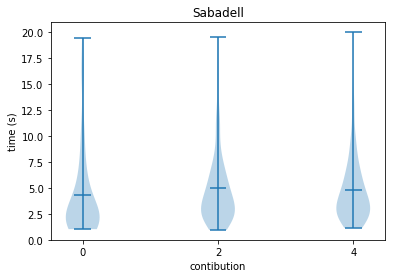

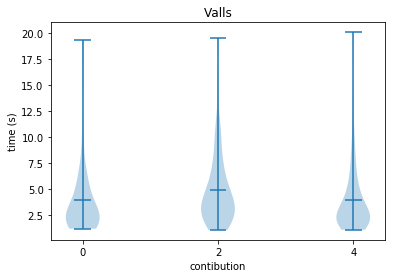

In [15]:
# mean time depending on contribution
for m in range(4):
    exec("userrounddf="+cityvect[m]+"userronda")
    exec("rounddf="+cityvect[m]+"ronda")
    time2=[[],[],[]]
    for j in range(len(userrounddf)):
        userrounddf.loc[j,"temps_inicial"]=rounddf.loc[j//6,"temps_inici_ronda"]
    for i in range(len(userrounddf)):
        if (pd.isna(userrounddf.loc[i,"temps_seleccio"])==False and pd.isna(userrounddf.loc[i,"temps_inicial"])==False):
            time1=str(userrounddf.loc[i,"temps_seleccio"])
            time0=str(userrounddf.loc[i,"temps_inicial"])
            mcs=float(time1[-6:])-float(time0[-6:])
            sec=float(time1[-9:-7])-float(time0[-9:-7])
            mnt=float(time1[-12:-10])-float(time0[-12:-10])
            hr=float(time1[-15:-13])-float(time0[-15:-13])
            time=3600.0*hr+60.0*mnt+sec+mcs/1000000.0
            for n in [0,1,2]:
                if (userrounddf.loc[i,"seleccio"]==2*n and time>=0):
                    time2[n].append(time)
    plt.violinplot(time2,positions=[0,2,4],showmeans=True)
    plt.xticks([0,2,4],[0,2,4])
    plt.xlabel("contibution")
    plt.ylabel("time (s)")
    plt.title(cityname[m])
    plt.show()

In [16]:
# Gini coefficient
for m in range(4):
    exec("userdf="+cityvect[m]+"user")
    income=userdf.sort_values("diners_clima")
    income=income["diners_clima"]
    income.dropna(inplace=True)
    income.reset_index(drop=True,inplace=True)
    sum1=0.0
    sum2=0.0
    n=len(income)
    for i in range(n):
        sum1+=income[i]
        for j in range(n):
            sum2+=abs(income[i]-income[j])
    gini=sum2/(2*n*sum1)
    print("Gini coefficient ("+cityname[m]+"):",gini)

Gini coefficient (Girona): 0.2532299741602067
Gini coefficient (Lleida): 0.31163538408063957
Gini coefficient (Sabadell): 0.21390562248995984
Gini coefficient (Valls): 0.39320935474781626


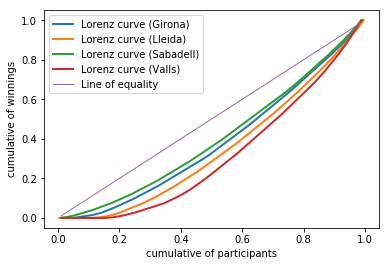

In [17]:
# Lorenz curve
for m in range(4):
    exec("userdf="+cityvect[m]+"user")
    income=userdf.sort_values("diners_clima")
    income=income[["diners_clima","id"]]
    income.dropna(inplace=True)
    n=len(income)
    income.reset_index(drop=True,inplace=True)
    cumulative=[]
    for i in range (n):
        if (i==0):
            cumulative.append(income.loc[i,"diners_clima"])
        else:
            cumulative.append(cumulative[i-1]+income.loc[i,"diners_clima"])
        income.loc[i,"id"]=(i+0.5)/n
    income['cumulative']=cumulative/max(cumulative)
    plt.plot(income["id"],income["cumulative"],lw=2,label="Lorenz curve ("+cityname[m]+")")
plt.plot(income["id"],income["id"],lw=1,label="Line of equality")
plt.xlabel("cumulative of participants")
plt.ylabel("cumulative of winnings")
plt.legend()
plt.show()